Lab Assignment 3
Raksha Venkatesha
BL.EN.U4AIE23159


A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes. Steps below (refer below
diagram for understanding):

. Calculate the mean for each class (also called as class centroid)
(Suggestion: You may use numpy . mean() function for finding the average vector for all
vectors in a given class. Please define the axis property appropriately to use this function. EX:
feat_vecs.mean (axis=0))
. Calculate spread (standard deviation) for each class
(Suggestion: You may use numpy . std() function for finding the standard deviation vector
for all vectors in a given class. Please define the axis property appropriately to use this
ƒunction.)
. Calculate the distance between mean vectors between classes
(Suggestion: numpy. linalg.norm(centroidl - centroid2) gives the Euclidean
distance between two centroids.)

In [1]:
import numpy as np
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\Raksha\Downloads\Retail_Transaction_Dataset.csv\Retail_Transaction_Dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Print column names
print("Column Names:", df.columns.tolist())

# Set the target label column
labels_column = 'ProductCategory'  # Change if needed

# Convert categorical labels to numeric
df[labels_column] = df[labels_column].astype('category').cat.codes  # Convert categories to numbers

# Select only numeric columns for features
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_columns)

# Extract labels and numeric feature data
labels = df[labels_column].values.astype(int)
data = df[numeric_columns].drop(columns=[labels_column]).values  # Remove labels column

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
print("Unique labels:", np.unique(labels))

# Compute centroids
unique_labels = np.unique(labels)
centroids = {}

for label in unique_labels:
    class_data = data[labels == label]  # Select data for the current class
    centroid = np.mean(class_data, axis=0)  # Compute centroid
    centroids[label] = centroid
    print(f"Centroid for class {label}:", centroid)

print("All centroids:", centroids)


Column Names: ['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate', 'PaymentMethod', 'StoreLocation', 'ProductCategory', 'DiscountApplied(%)', 'TotalAmount']
Numeric Columns: ['CustomerID', 'Quantity', 'Price', 'ProductCategory', 'DiscountApplied(%)', 'TotalAmount']
Data shape: (100000, 5)
Labels shape: (100000,)
Unique labels: [0 1 2 3]
Centroid for class 0: [5.02008504e+05 5.03563581e+00 5.51015895e+01 9.99693500e+00
 2.50003477e+02]
Centroid for class 1: [4.98322535e+05 4.99058110e+00 5.51274685e+01 1.00193783e+01
 2.47665324e+02]
Centroid for class 2: [4.99389264e+05 5.01588635e+00 5.49581810e+01 9.98194055e+00
 2.47968578e+02]
Centroid for class 3: [5.02143249e+05 4.99502468e+00 5.50819629e+01 1.00825718e+01
 2.47699770e+02]
All centroids: {0: array([5.02008504e+05, 5.03563581e+00, 5.51015895e+01, 9.99693500e+00,
       2.50003477e+02]), 1: array([4.98322535e+05, 4.99058110e+00, 5.51274685e+01, 1.00193783e+01,
       2.47665324e+02]), 2: array([4.99389264e+05, 5.0158

In [2]:
# Calculate the spread (standard deviation) for each class
spreads = {}

for label in unique_labels:
    class_data = data[labels == label]
    spread = class_data.std(axis=0)
    spreads[label] = spread
    print(f"Spread for class {label}:", spread)

print("All spreads:", spreads)

Spread for class 0: [2.88223371e+05 2.57131291e+00 2.60576974e+01 5.79366457e+00
 1.85028195e+02]
Spread for class 1: [2.89088549e+05 2.58073483e+00 2.59361222e+01 5.80175137e+00
 1.84347018e+02]
Spread for class 2: [2.88019443e+05 2.58262961e+00 2.59989196e+01 5.76036337e+00
 1.84548969e+02]
Spread for class 3: [2.88485222e+05 2.58425710e+00 2.58921195e+01 5.76147951e+00
 1.84279170e+02]
All spreads: {0: array([2.88223371e+05, 2.57131291e+00, 2.60576974e+01, 5.79366457e+00,
       1.85028195e+02]), 1: array([2.89088549e+05, 2.58073483e+00, 2.59361222e+01, 5.80175137e+00,
       1.84347018e+02]), 2: array([2.88019443e+05, 2.58262961e+00, 2.59989196e+01, 5.76036337e+00,
       1.84548969e+02]), 3: array([2.88485222e+05, 2.58425710e+00, 2.58921195e+01, 5.76147951e+00,
       1.84279170e+02])}


In [3]:
# Calculate the distance between the mean vectors (centroids) of each pair of classes
distances = {}

for i, label1 in enumerate(unique_labels):
    for j, label2 in enumerate(unique_labels):
        if i < j:  
            centroid1 = centroids[label1]
            centroid2 = centroids[label2]
            distance = np.linalg.norm(centroid1 - centroid2)
            distances[(label1, label2)] = distance
            print(f"Distance between class {label1} and class {label2}: {distance}")

print("All distances:", distances)

Distance between class 0 and class 1: 3685.969476155985
Distance between class 0 and class 2: 2619.240423640699
Distance between class 0 and class 3: 134.76431742175563
Distance between class 1 and class 2: 1066.729162489543
Distance between class 1 and class 3: 3820.7133261123568
Distance between class 2 and class 3: 2753.9842379845304
All distances: {(0, 1): 3685.969476155985, (0, 2): 2619.240423640699, (0, 3): 134.76431742175563, (1, 2): 1066.729162489543, (1, 3): 3820.7133261123568, (2, 3): 2753.9842379845304}


A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data.

(Suggestion: numpy.histogram () gives the histogram data. Plot of histogram may be
achieved with matplotlib.pyplot.hist ())

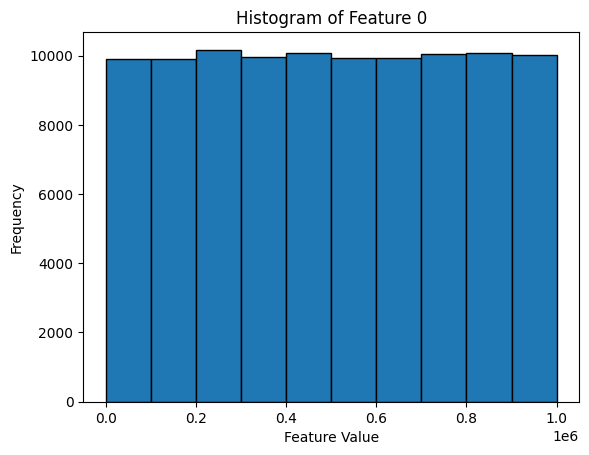

Mean of feature 0: 500463.98218
Variance of feature 0: 83208868841.531


In [4]:
import matplotlib.pyplot as plt

feature_index = 0
feature_data = data[:, feature_index]

hist, bin_edges = np.histogram(feature_data, bins=10)

# Plot the histogram
plt.hist(feature_data, bins=10, edgecolor='black')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature {}'.format(feature_index))
plt.show()

mean = np.mean(feature_data)
variance = np.var(feature_data)

print("Mean of feature {}: {}".format(feature_index, mean))
print("Variance of feature {}: {}".format(feature_index, variance))

A3.Take any two feature vectors fromm your dataset.Calculate the Minkwoski distance with r from 1 to 10.Make a plot of the distance and observe the nature of this graph.

Minkowski distance with r=1: 884120.9965666101
Minkowski distance with r=2: 883911.0221074705
Minkowski distance with r=3: 883911.000003289
Minkowski distance with r=4: 883911.0000000006
Minkowski distance with r=5: 883911.0000000007
Minkowski distance with r=6: 883910.9999999993
Minkowski distance with r=7: 883910.9999999993
Minkowski distance with r=8: 883911.0
Minkowski distance with r=9: 883910.9999999993
Minkowski distance with r=10: 883911.0000000007


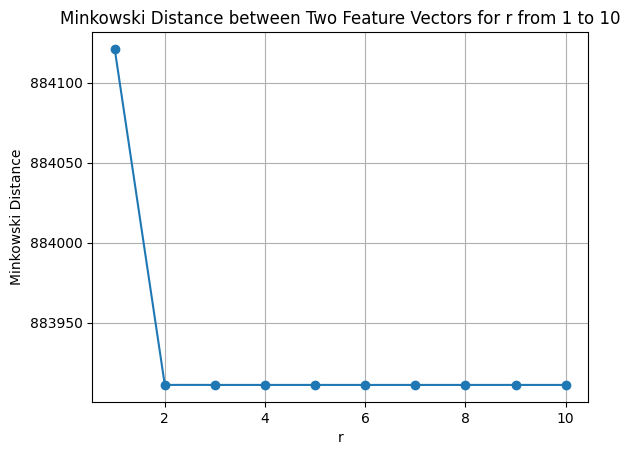

In [5]:
from scipy.spatial import distance

feature_vector_1 = data[0]
feature_vector_2 = data[1]

r_values = range(1, 11)
minkowski_distances = []

for r in r_values:
    dist = distance.minkowski(feature_vector_1, feature_vector_2, r)
    minkowski_distances.append(dist)
    print(f"Minkowski distance with r={r}: {dist}")

plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors for r from 1 to 10')
plt.grid(True)
plt.show()

A4. Divide dataset in your project into two parts - train & test set. To accomplish this, use the train-
test_split() function available in Scikit. See below sample code for help:

>>> import numpy as np
>>> from sklearn.model selection import train test split
>>> X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# Check the unique labels in the dataset
print("Unique labels:", np.unique(labels))

# Define the selected classes (modify if necessary)
selected_classes = [0, 1, 2, 3]

# Select data and labels for the selected classes
valid_classes = np.isin(labels, selected_classes)

# Select only the rows where the label is in the selected classes
selected_data = data[valid_classes]
selected_labels = labels[valid_classes]

# Ensure that the selected data is non-empty
if selected_data.shape[0] == 0:
    print("No data available for selected classes:", selected_classes)
else:
    # Split the selected data into training and testing sets (30% test size)
    X_train, X_test, y_train, y_test = train_test_split(selected_data, selected_labels, test_size=0.3, random_state=42)

    # Print the shapes of the resulting datasets
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)



Unique labels: [0 1 2 3]
X_train shape: (70000, 5)
X_test shape: (30000, 5)
y_train shape: (70000,)
y_test shape: (30000,)


A5. Train a kNN classifier (k=3) using the training set obtained from above exercise. Following co
for help:

>>> import numpy as np
>>> from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=3)


A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for
help.

>>> neigh.score(X_test, y_test)

In [8]:
# Test the accuracy of the kNN classifier using the test set
accuracy = neigh.score(X_test, y_test)

print("Accuracy of kNN classifier:", accuracy)

Accuracy of kNN classifier: 0.2532333333333333


A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

>>> neigh.predict(X_test)

Perform classification for a given vector using neigh.predict( << test_vect>>). This shall produce the
class of the test vector (test_vect is any feature vector from your test set).

In [9]:

predictions = neigh.predict(X_test)


print("Predictions for the test set:", predictions)

test_vect = X_test[0]
predicted_class = neigh.predict([test_vect])


print("Predicted class for the given test vector:", predicted_class)

Predictions for the test set: [1 3 0 ... 3 2 1]
Predicted class for the given test vector: [1]


A8.Make k=1 to implement NN classifier compare the results with knn(k=3).vary k from 1 to 11 and make an accuracy plot

Accuracy of NN classifier (k=1): 0.2518666666666667
Accuracy of kNN classifier (k=1): 0.2518666666666667
Accuracy of kNN classifier (k=2): 0.25526666666666664
Accuracy of kNN classifier (k=3): 0.2532333333333333
Accuracy of kNN classifier (k=4): 0.2529
Accuracy of kNN classifier (k=5): 0.2518666666666667
Accuracy of kNN classifier (k=6): 0.25183333333333335
Accuracy of kNN classifier (k=7): 0.2532
Accuracy of kNN classifier (k=8): 0.25356666666666666
Accuracy of kNN classifier (k=9): 0.2536
Accuracy of kNN classifier (k=10): 0.2527333333333333
Accuracy of kNN classifier (k=11): 0.25403333333333333


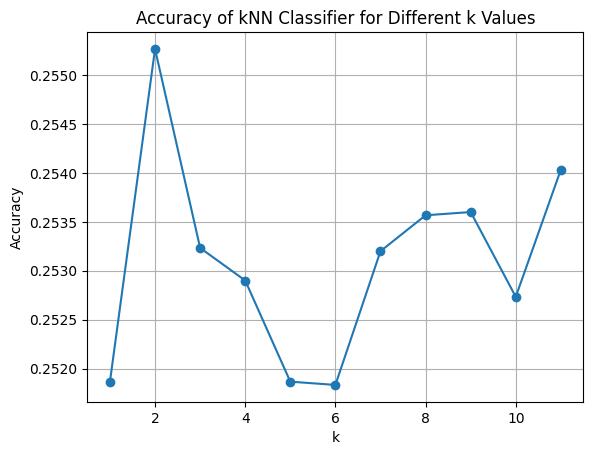

In [10]:
# Initialize the NN classifier with k=1
nn_classifier = KNeighborsClassifier(n_neighbors=1)

nn_classifier.fit(X_train, y_train)

nn_accuracy = nn_classifier.score(X_test, y_test)

print("Accuracy of NN classifier (k=1):", nn_accuracy)


# Vary k from 1 to 11 and calculate the accuracy for each k
k_values = range(1, 12)
accuracies = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy of kNN classifier (k={k}):", accuracy)

# Plot the accuracies
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.show()

A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

Accuracy of NN classifier (k=1): 0.2518666666666667
Accuracy of kNN classifier (k=1): 0.2518666666666667
Accuracy of kNN classifier (k=2): 0.25526666666666664
Accuracy of kNN classifier (k=3): 0.2532333333333333
Accuracy of kNN classifier (k=4): 0.2529
Accuracy of kNN classifier (k=5): 0.2518666666666667
Accuracy of kNN classifier (k=6): 0.25183333333333335
Accuracy of kNN classifier (k=7): 0.2532
Accuracy of kNN classifier (k=8): 0.25356666666666666
Accuracy of kNN classifier (k=9): 0.2536
Accuracy of kNN classifier (k=10): 0.2527333333333333
Accuracy of kNN classifier (k=11): 0.25403333333333333


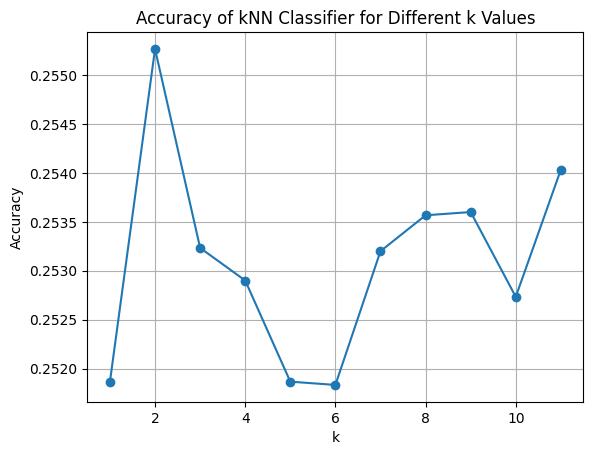

Confusion Matrix for Test Set:
 [[1879 1849 1908 1913]
 [1853 1924 1866 1924]
 [1803 1897 1905 1865]
 [1802 1930 1834 1848]]
Confusion Matrix for Training Set:
 [[17482     0     0     0]
 [    0 17489     0     0]
 [    0     0 17520     0]
 [    0     0     0 17509]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.26      0.25      0.25      7549
           1       0.25      0.25      0.25      7567
           2       0.25      0.26      0.25      7470
           3       0.24      0.25      0.25      7414

    accuracy                           0.25     30000
   macro avg       0.25      0.25      0.25     30000
weighted avg       0.25      0.25      0.25     30000

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17482
           1       1.00      1.00      1.00     17489
           2       1.00      1.00      1.00     17520


In [11]:
from sklearn.neighbors import KNeighborsClassifier

nn_classifier = KNeighborsClassifier(n_neighbors=1)


nn_classifier.fit(X_train, y_train)


nn_accuracy = nn_classifier.score(X_test, y_test)


print("Accuracy of NN classifier (k=1):", nn_accuracy)

k_values = range(1, 12)
accuracies = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    accuracy = classifier.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy of kNN classifier (k={k}):", accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.show()
from sklearn.metrics import confusion_matrix, classification_report


y_pred_test = nn_classifier.predict(X_test)

y_pred_train = nn_classifier.predict(X_train)


conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for Test Set:\n", conf_matrix_test)


conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix for Training Set:\n", conf_matrix_train)


class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report for Test Set:\n", class_report_test)


class_report_train = classification_report(y_train, y_pred_train)
print("Classification Report for Training Set:\n", class_report_train)